In [1]:
import pandas as pd
dataset = pd.read_csv('none-linear-dataset.csv').values
print(dataset)

[[ -9. 102.]
 [ -8. 112.]
 [ -7.  72.]
 [ -6.  46.]
 [ -5.  70.]
 [ -4.  57.]
 [ -3.  28.]
 [ -2.  12.]
 [ -1.  36.]
 [  0.  21.]
 [  1.   9.]
 [  2.   7.]
 [  3.  37.]
 [  4.  30.]
 [  5.  40.]
 [  6.  44.]
 [  7.  97.]
 [  8.  76.]
 [  9.  90.]]


In [2]:
data = dataset[:,0]
target = dataset[:,1]

[]

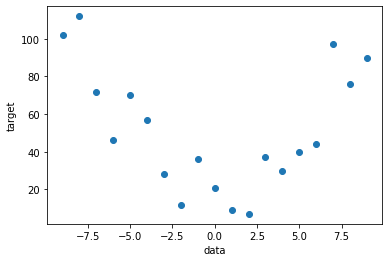

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data,target)
plt.xlabel('data')
plt.ylabel('target')
plt.plot()

In [4]:
import numpy as np

x1 = dataset[:,0].reshape(-1,1)
print('x1:',x1)
x2 = np.power(x1,2)
print('x2:',x2)

x1: [[-9.]
 [-8.]
 [-7.]
 [-6.]
 [-5.]
 [-4.]
 [-3.]
 [-2.]
 [-1.]
 [ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]]
x2: [[81.]
 [64.]
 [49.]
 [36.]
 [25.]
 [16.]
 [ 9.]
 [ 4.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 4.]
 [ 9.]
 [16.]
 [25.]
 [36.]
 [49.]
 [64.]
 [81.]]


In [5]:
data_new = np.append(x1,x2,axis=1)
print(data_new)

[[-9. 81.]
 [-8. 64.]
 [-7. 49.]
 [-6. 36.]
 [-5. 25.]
 [-4. 16.]
 [-3.  9.]
 [-2.  4.]
 [-1.  1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]
 [ 7. 49.]
 [ 8. 64.]
 [ 9. 81.]]


In [6]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data_new,target,test_size=0.1)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_data,train_target)

LinearRegression()

In [8]:
print('coefs:',model.coef_)
print('c:',model.intercept_)

coefs: [-0.64565849  1.08263179]
c: 18.994436196425134


In [9]:
a1 = model.coef_[0]
a2 = model.coef_[1]
a0 = model.intercept_

In [10]:
xvals = np.arange(-10,10)
yvlas = a1 * xvals + a2 * np.power(xvals,2) + a0

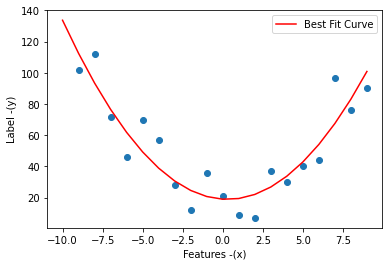

In [11]:
plt.scatter(data,target)
plt.plot(xvals,yvlas,'r',label='Best Fit Curve')
plt.xlabel('Features -(x)')
plt.ylabel('Label -(y)')
plt.legend()
plt.show()

In [12]:
data = dataset[:,0].reshape(-1,1)

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=False)
data_new = poly.fit_transform(data)

print(data_new)

[[-9. 81.]
 [-8. 64.]
 [-7. 49.]
 [-6. 36.]
 [-5. 25.]
 [-4. 16.]
 [-3.  9.]
 [-2.  4.]
 [-1.  1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  4.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 6. 36.]
 [ 7. 49.]
 [ 8. 64.]
 [ 9. 81.]]


In [14]:
model.fit(train_data,train_target)

LinearRegression()

In [15]:
print('m:',model.coef_)
print('c:',model.intercept_)

m: [-0.64565849  1.08263179]
c: 18.994436196425134


In [16]:
test_data = [[7.5]]
test_data_new = poly.transform(test_data)
print('test_data_new',test_data_new)
result = model.predict(test_data_new)
print('result:',result)

test_data_new [[ 7.5  56.25]]
result: [75.0500358]
